<a href="https://colab.research.google.com/github/Fadinrsultan/regression_real_data_set/blob/main/Final_assignment_for_individual_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1,below you will find assignment 2 final one:

1. Go to Kaggle.com

2. Find a dataset that is complex enough (20+ features), diverse enough (there are both numeric and categorical features), and interesting for you.

3. Build a linear regression for one numeric variable of your choice.

4. Plot the distribution of the residuals.

5. Send the link to the google colab with your submission.
Add submission


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd #Data manipulation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


url to data set: https://drive.google.com/file/d/1GQyK6FfTLUkAxXBJoIbu1n3Jq-EIBYiC/view?usp=share_link

In [ ]:
import pandas as pd #data analysis and manipulation too
df=pd.read_csv('/content/drive/MyDrive/cars.csv')


In [ ]:
df.head()#return first 5 rows by defult

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [ ]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


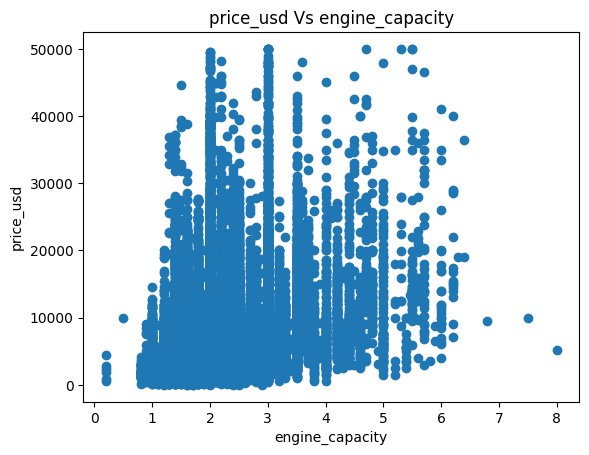

In [ ]:
# Plot of Training Data
x=df.engine_capacity
n = len(x)
y=df.price_usd
plt.scatter(x, y)
plt.xlabel('engine_capacity')
plt.ylabel('price_usd')
plt.title("price_usd Vs engine_capacity")
plt.show()

I used 3 diffrent methods to implement the linear regression

A.sklearn

B.tensorflow

C.seaborn (Visualization)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Removing rows with missing engine_capacity
clean_data = df.dropna(subset=['engine_capacity'])

# Selecting the features and target variable
X = clean_data[['engine_capacity']]
y = clean_data['price_usd']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)




In [ ]:
# Calculating metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(6169.935178873486, 0.09710865637970056)

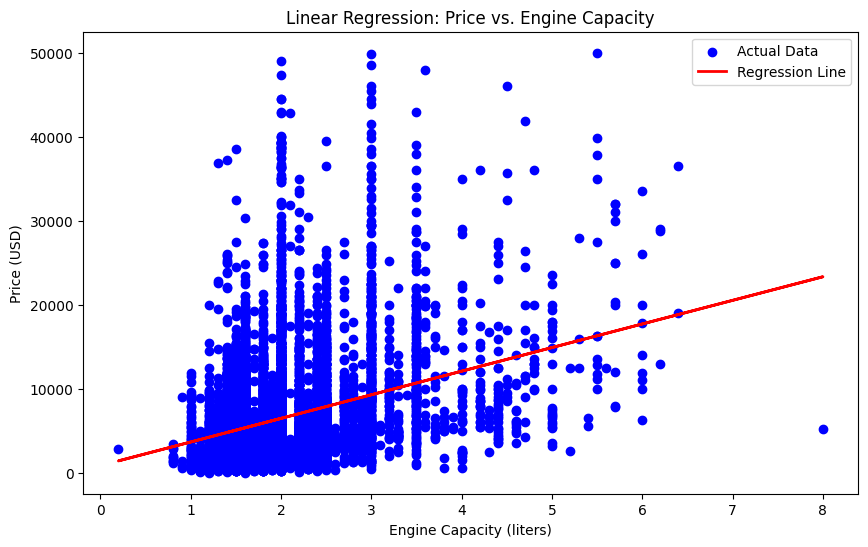

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Price vs. Engine Capacity')
plt.xlabel('Engine Capacity (liters)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Coefficients from the model
intercept = model.intercept_
slope = model.coef_[0]

intercept, slope


(847.014984325062, 2810.4850354853975)

In [ ]:
print('price (usd)= ',intercept,'+',slope,'Engine Capacity (liters)')

price (usd)=  847.014984325062 + 2810.4850354853975 Engine Capacity (liters)


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.1)


# Load the data
data = df
data = data.dropna(subset=['engine_capacity'])

# Features and labels
X = data['engine_capacity'].values.reshape(-1, 1)
y = data['price_usd'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Get the model weights (slope and intercept)
weights = model.get_weights()
intercept, slope = weights[1][0], weights[0][0][0]

print("Loss:", loss)
print("Intercept:", intercept)
print("Slope:", slope)


Epoch 1/50
771/771 [==============================] - 2s 2ms/step - loss: 83994488.0000 - val_loss: 78766536.0000
Epoch 2/50
771/771 [==============================] - 2s 3ms/step - loss: 80902616.0000 - val_loss: 75790632.0000
Epoch 3/50
771/771 [==============================] - 1s 2ms/step - loss: 77954992.0000 - val_loss: 72948304.0000
Epoch 4/50
771/771 [==============================] - 1s 2ms/step - loss: 75138920.0000 - val_loss: 70237744.0000
Epoch 5/50
771/771 [==============================] - 2s 2ms/step - loss: 72451920.0000 - val_loss: 67651616.0000
Epoch 6/50
771/771 [==============================] - 1s 2ms/step - loss: 69882536.0000 - val_loss: 65179104.0000
Epoch 7/50
771/771 [==============================] - 1s 2ms/step - loss: 67420632.0000 - val_loss: 62812720.0000
Epoch 8/50
771/771 [==============================] - 1s 2ms/step - loss: 65067628.0000 - val_loss: 60553920.0000
Epoch 9/50
771/771 [==============================] - 1s 2ms/step - loss: 62822780.0000 

4/4 [==============================] - 0s 3ms/step


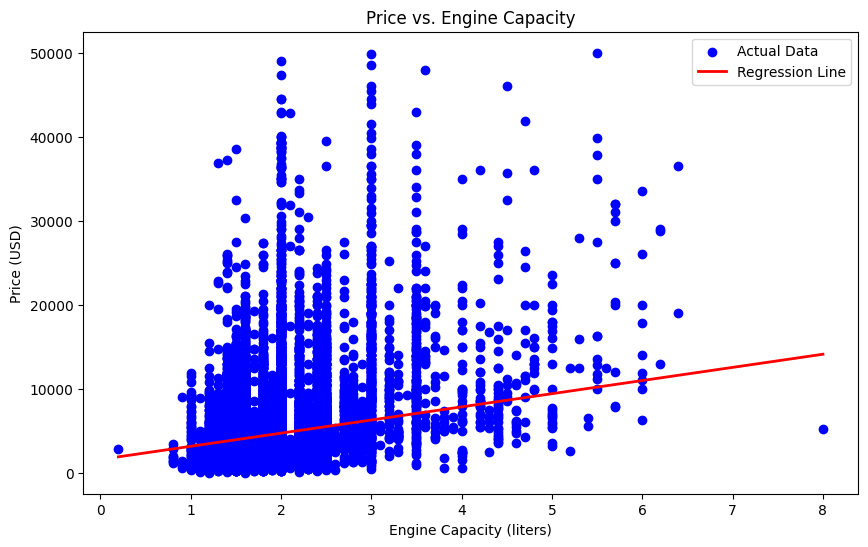

In [ ]:
# Generate predictions for plotting
line_x = np.linspace(X.min(), X.max(), 100)
line_y = model.predict(line_x)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(line_x, line_y, color='red', linewidth=2, label='Regression Line')
plt.title('Price vs. Engine Capacity')
plt.xlabel('Engine Capacity (liters)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
print('price (usd)= ',intercept,'+',slope,'Engine Capacity (liters)')

price (usd)=  847.014984325062 + 2810.4850354853975 Engine Capacity (liters)


<ipython-input-16-d76fb4908abd>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


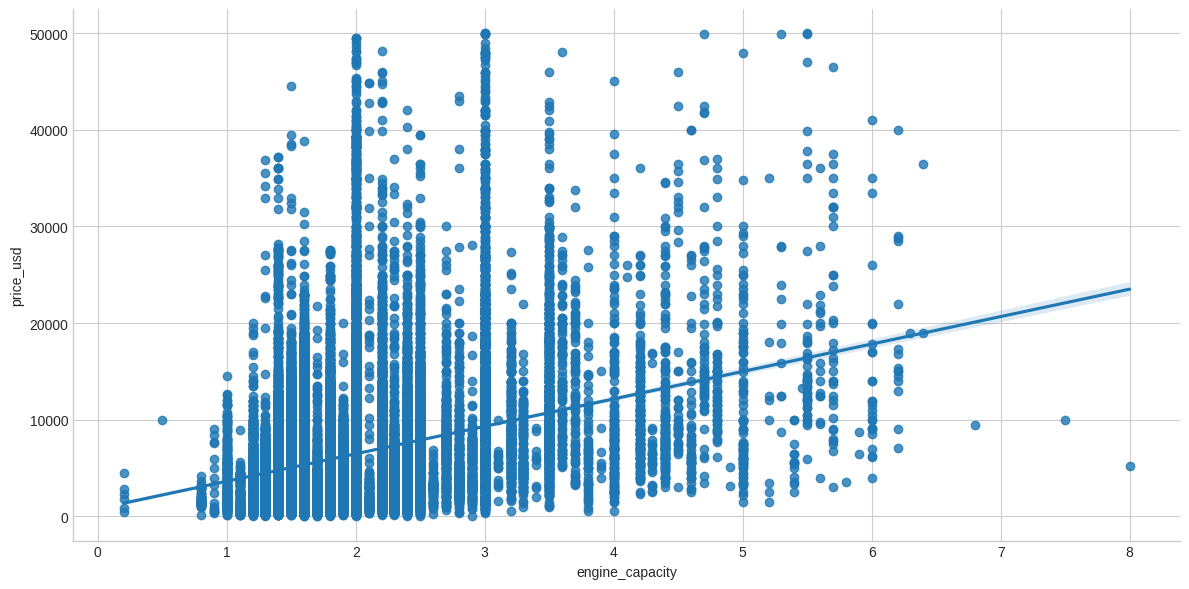

In [ ]:
import seaborn as sns #is a Python data visualization library based on matplotlib.
plt.style.use('seaborn-whitegrid')
sns.lmplot(x='engine_capacity',y='price_usd',data=df,aspect=2
           ,height=6)

Assignment 2:
1. Use the same dataset that you choose on Kaggle.

2. Build k-nn regression for it. Compare your results.

3. Choose a binary variable in your data. If the only reasonable variable to work with is your target, split your target into two categories and work with a new variable.

4. Build logistic regression for your categoric variable.

5. Choose threshold that maximizes recall. Choose threshold that maximizes F-1 score.

6. Submit your work in the same google colab you worked with already. Let it follow your first assignment. Post the link in the answer form.


In [ ]:
#Assignment 2:Build k-nn regression for it.
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Handling missing values in 'engine_capacity'
imputer = SimpleImputer(strategy='median')
data['engine_capacity'] = imputer.fit_transform(data[['engine_capacity']])

# Selecting features and target
features = data[['odometer_value', 'year_produced', 'engine_capacity']]
target = data['price_usd']

# Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Creating the kNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Training the model
knn_regressor.fit(X_train, y_train)

# Making predictions
y_pred = knn_regressor.predict(X_test)



<ipython-input-21-8a0f0c6be36f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine_capacity'] = imputer.fit_transform(data[['engine_capacity']])


In [ ]:
y_pred

array([ 5560. ,  1890. , 35637.8, ...,  1030. , 11467.8, 19469.8])

In [ ]:
# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 2744.6893517794842


Assignment 2:  Compare your results?

Answer:Root Mean Squared Error (RMSE) is lower than linear regression.

Assignment 2: 3.Choose a binary variable in your data. If the only reasonable variable to work with is your target, split your target into two categories and work with a new variable.

In [ ]:
# Checking unique values and their distribution in binary columns
binary_columns = ['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2']
binary_distribution = {col: data[col].value_counts() for col in binary_columns}

binary_distribution


{'engine_has_gas': engine_has_gas
 False    37174
 True      1347
 Name: count, dtype: int64,
 'has_warranty': has_warranty
 False    38072
 True       449
 Name: count, dtype: int64,
 'is_exchangeable': is_exchangeable
 False    24939
 True     13582
 Name: count, dtype: int64,
 'feature_0': feature_0
 False    29715
 True      8806
 Name: count, dtype: int64,
 'feature_1': feature_1
 True     23389
 False    15132
 Name: count, dtype: int64,
 'feature_2': feature_2
 False    29900
 True      8621
 Name: count, dtype: int64}

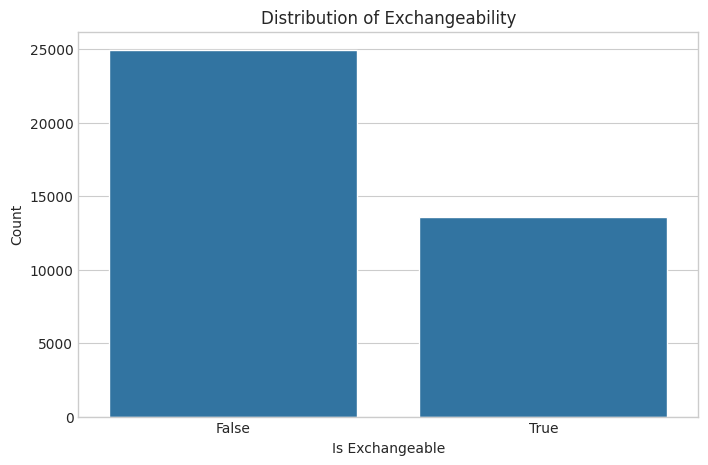

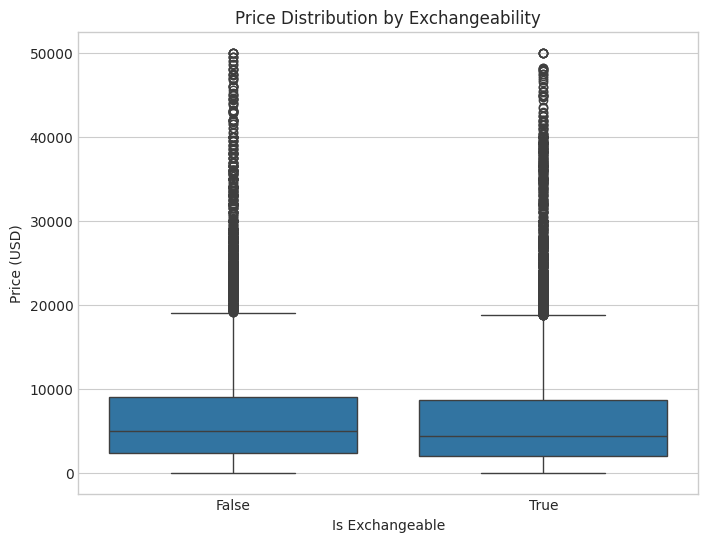

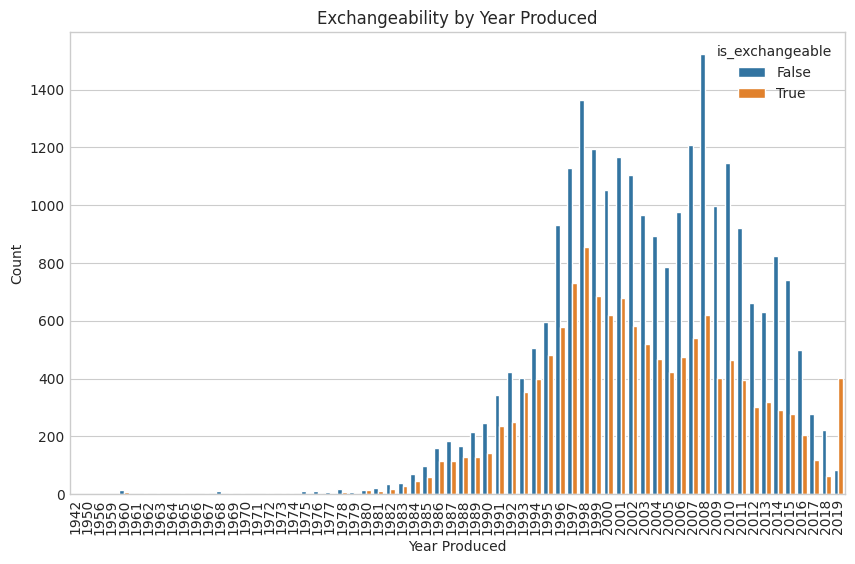

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot 1: Distribution of `is_exchangeable`
plt.figure(figsize=(8, 5))
sns.countplot(x='is_exchangeable', data=data)
plt.title('Distribution of Exchangeability')
plt.xlabel('Is Exchangeable')
plt.ylabel('Count')
plt.show()

# Plot 2: Box plot of price for exchangeable vs. non-exchangeable cars
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_exchangeable', y='price_usd', data=data)
plt.title('Price Distribution by Exchangeability')
plt.xlabel('Is Exchangeable')
plt.ylabel('Price (USD)')
plt.show()

# Plot 3: Exchangeability by Year Produced
plt.figure(figsize=(10, 6))
sns.countplot(x='year_produced', hue='is_exchangeable', data=data)
plt.title('Exchangeability by Year Produced')
plt.xlabel('Year Produced')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


4. Build logistic regression for your categoric variable.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecting features and target
# Redefine the features explicitly for logistic regression
features_logistic = data[['odometer_value', 'year_produced', 'engine_capacity']]
target_logistic = data['is_exchangeable']

# Splitting the data into train and test sets for logistic regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    features_logistic, target_logistic, test_size=0.2, random_state=42)



In [ ]:
# Adjusting logistic regression with class weights
logistic_model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')

# Training the adjusted model
logistic_model_balanced.fit(X_train_logistic, y_train_logistic)

# Making predictions with the adjusted model
y_pred_balanced = logistic_model_balanced.predict(X_test_logistic)

# Evaluating the adjusted model
accuracy_balanced = accuracy_score(y_test_logistic, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_logistic, y_pred_balanced)
report_balanced = classification_report(y_test_logistic, y_pred_balanced)

accuracy_balanced, conf_matrix_balanced, report_balanced


(0.5304347826086957,
 array([[2678, 2278],
        [1340, 1409]]),
 '              precision    recall  f1-score   support\n\n       False       0.67      0.54      0.60      4956\n        True       0.38      0.51      0.44      2749\n\n    accuracy                           0.53      7705\n   macro avg       0.52      0.53      0.52      7705\nweighted avg       0.57      0.53      0.54      7705\n')

5. Choose threshold that maximizes recall. Choose threshold that maximizes F-1 score.



In [ ]:
from sklearn.metrics import recall_score, f1_score

# Get the predicted probabilities for the positive class
probabilities = logistic_model.predict_proba(X_test_logistic)[:, 1]

# Initialize variables to store the best thresholds
best_recall_threshold = 0
best_f1_threshold = 0
max_recall = 0
max_f1 = 0

# Check thresholds from 0 to 1 with a step of 0.01
thresholds = np.arange(0, 1, 0.01)
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the current threshold
    predictions = (probabilities >= threshold).astype(int)

    # Calculate recall and F-1 score for the current threshold
    recall = recall_score(y_test_logistic, predictions)
    f1 = f1_score(y_test_logistic, predictions)

    # Update the best thresholds if the current metrics are better
    if recall > max_recall:
        max_recall = recall
        best_recall_threshold = threshold
    if f1 > max_f1:
        max_f1 = f1
        best_f1_threshold = threshold

(best_recall_threshold, max_recall, best_f1_threshold, max_f1)


(0.0, 1.0, 0.0, 0.5259230916395639)

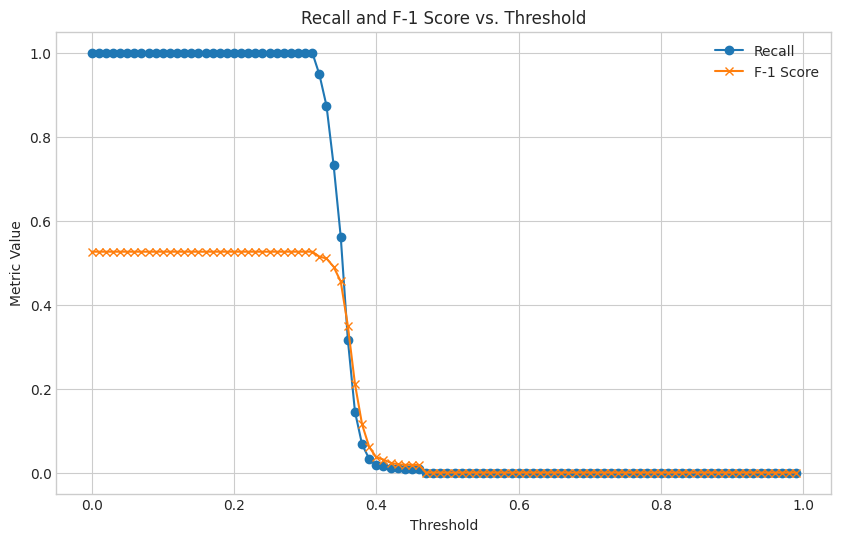

In [ ]:
import matplotlib.pyplot as plt

# Reinitialize metrics arrays to plot them
recalls = []
f1_scores = []

# Recalculate metrics for each threshold
for threshold in thresholds:
    predictions = (probabilities >= threshold).astype(int)
    recalls.append(recall_score(y_test_logistic, predictions))
    f1_scores.append(f1_score(y_test_logistic, predictions))

# Plotting recall and F-1 scores against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F-1 Score', marker='x')
plt.title('Recall and F-1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


## **Final assignment for individual projects:**

2. Do the test-train split.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
# Assuming 'price_usd' is the target column
feature_columns = df.columns.drop('price_usd')
target_column = 'price_usd'

# Split the data into features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Perform the test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((30824, 29), (7707, 29), (30824,), (7707,))

Visualizations:


1.Histograms: To understand the distribution of numerical features.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization style
sns.set(style="whitegrid")


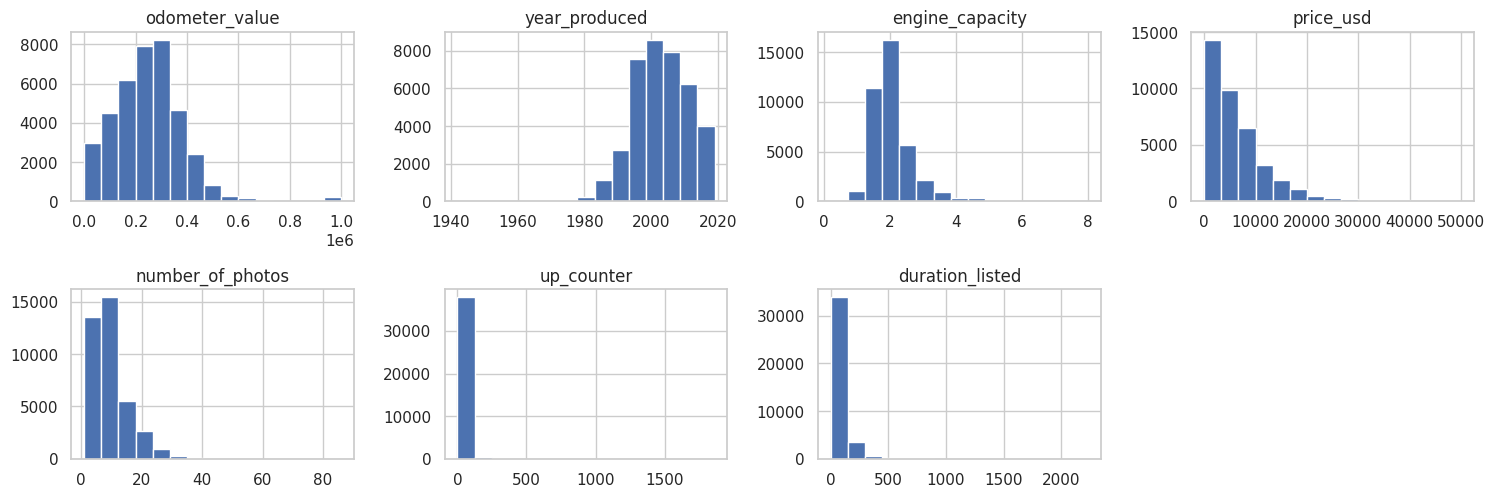

In [ ]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


2.Scatter Plots: To visualize the relationship between the target variable and some numerical features.

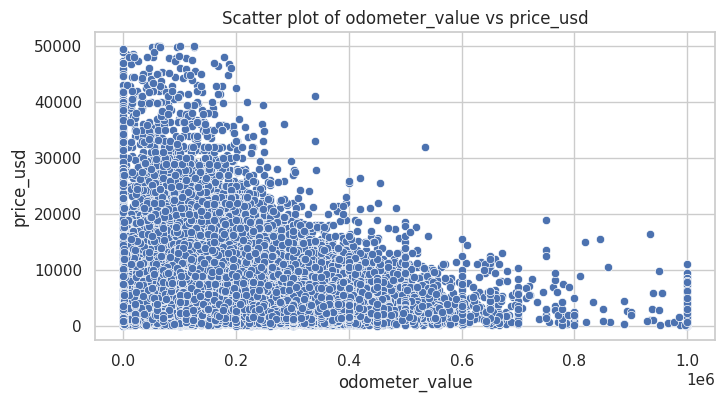

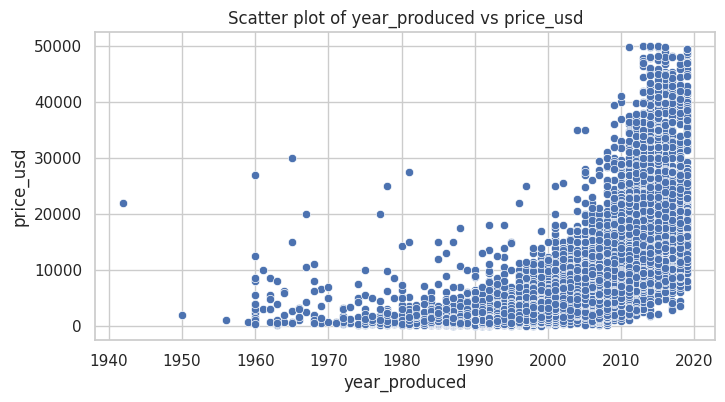

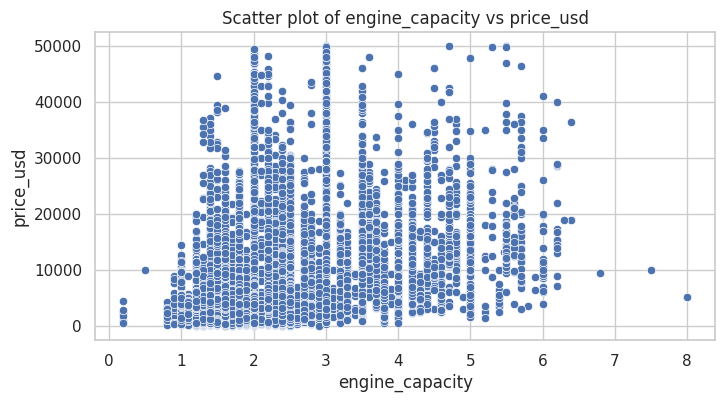

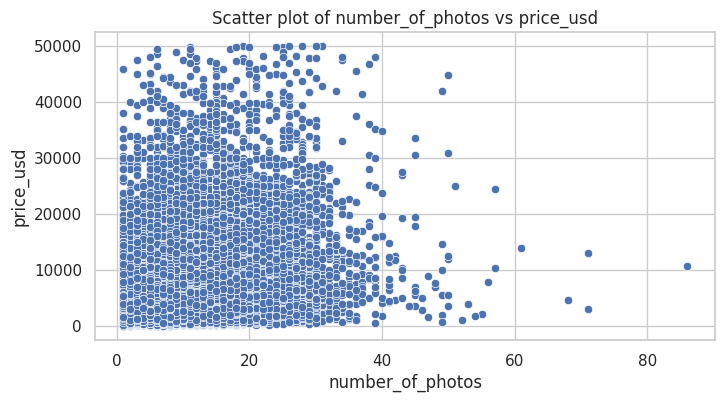

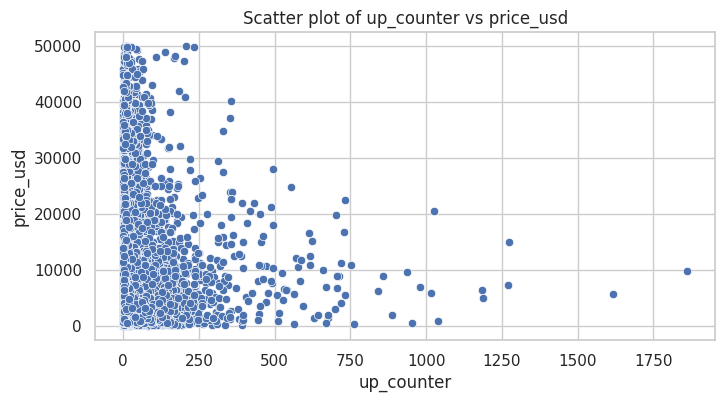

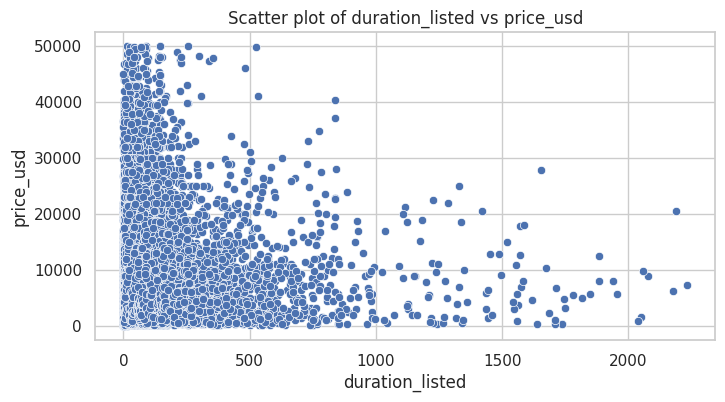

In [ ]:
# Scatter plots to visualize the relationship between numerical features and the target variable
for feature in numerical_features:
    if feature != 'price_usd':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=feature, y='price_usd')
        plt.title(f'Scatter plot of {feature} vs price_usd')
        plt.show()


3.Correlation Matrix: To see the correlation between different features.

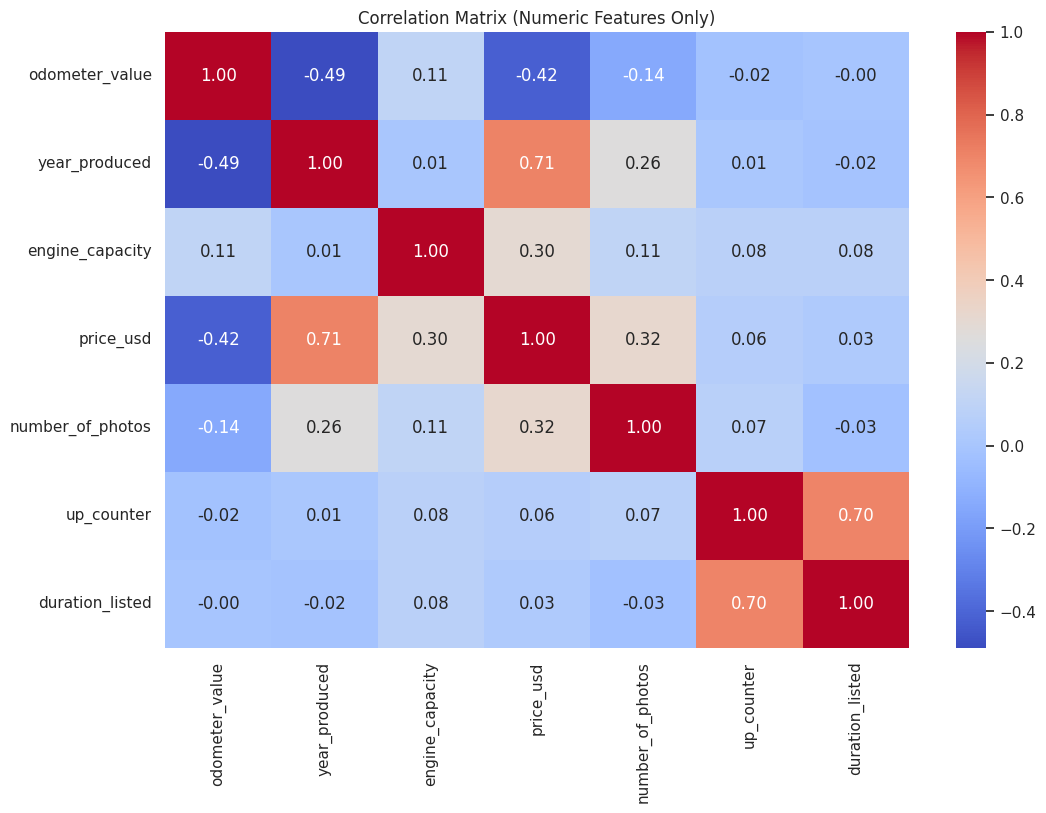

In [ ]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


4.Box Plots: To identify any potential outliers in the dataset.

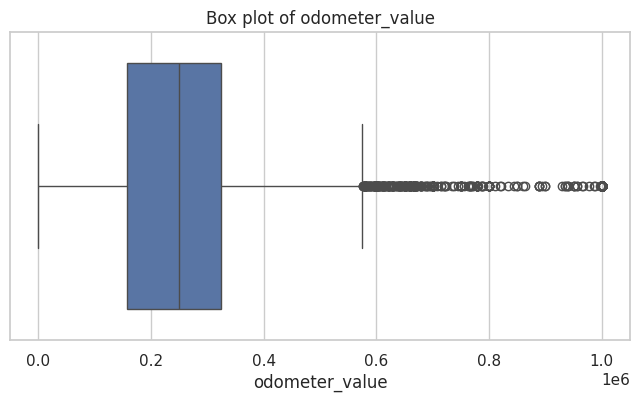

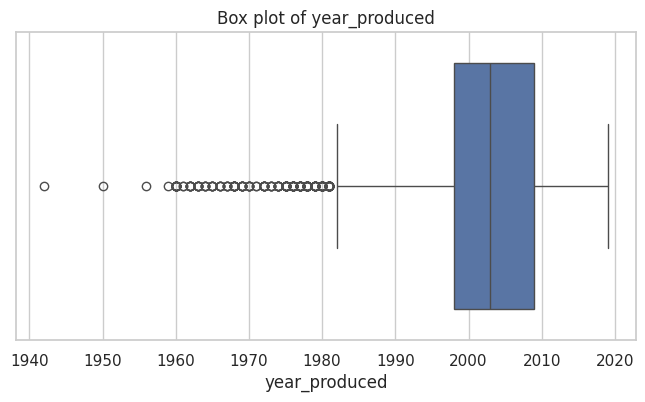

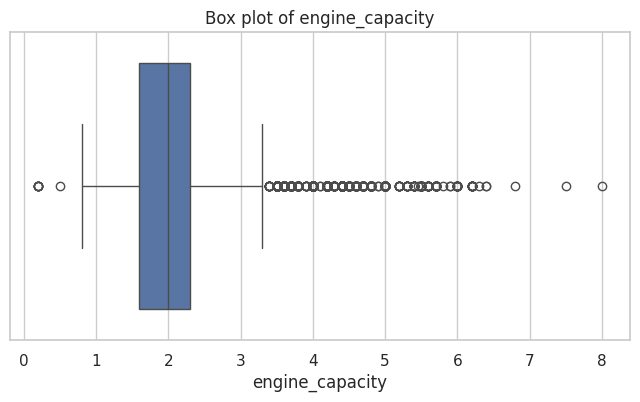

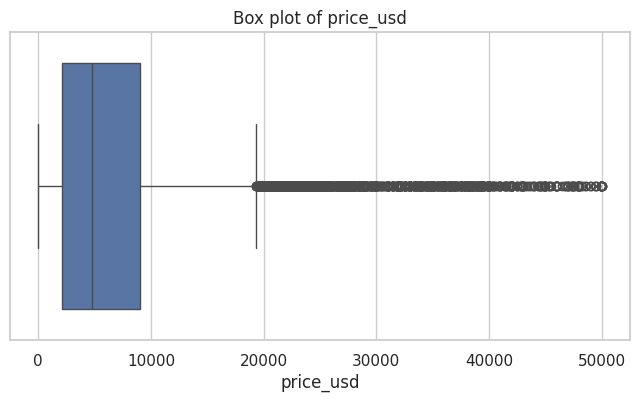

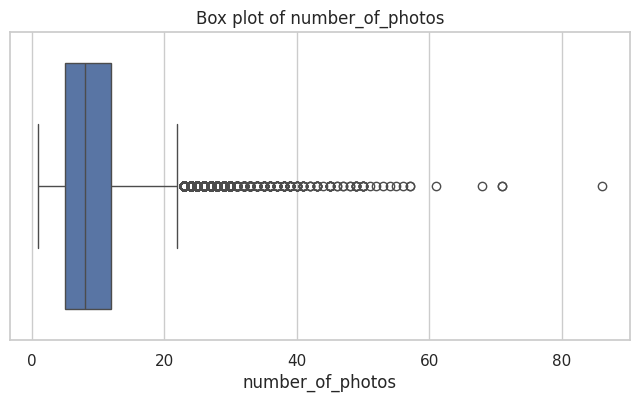

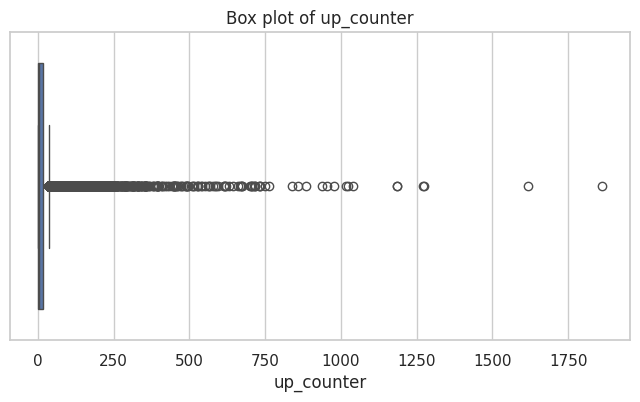

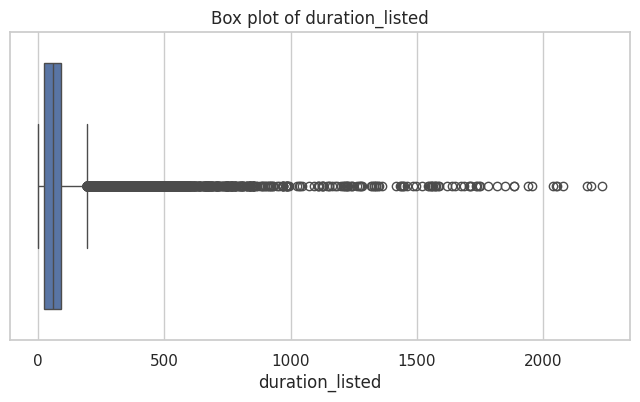

In [ ]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box plot of {feature}')
    plt.show()


3.Build the best regression for your target variable (based on the tools we covered in the course: linear regression, k-nn regression, decision tree, random forest). Choose the hyper parameters that minimize error on test.

I will  use LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, and RandomForestRegressor from scikit-learn.


# **some steps are repeated from previous tasks only to avoid any confusion.**

---



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop(target_column)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')


Linear Regression MSE: 6897078.43554796


In [ ]:
# K-NN Regression
from sklearn.model_selection import RandomizedSearchCV

knn_model = KNeighborsRegressor()
# Define a list of hyperparameters to test
hyperparameters = [
    {'n_neighbors': 3, 'weights': 'uniform'},
    {'n_neighbors': 3, 'weights': 'distance'},
    {'n_neighbors': 5, 'weights': 'uniform'},
    {'n_neighbors': 5, 'weights': 'distance'},
    {'n_neighbors': 7, 'weights': 'uniform'},
    {'n_neighbors': 7, 'weights': 'distance'}
]

# Initialize variables to store the best model and lowest MSE
best_mse = float('inf')
best_params = None
best_model = None

# Loop over the hyperparameters
for params in hyperparameters:
    # Define the K-NN regression model with the current hyperparameters
    knn_model = KNeighborsRegressor(n_neighbors=params['n_neighbors'], weights=params['weights'])

    # Train the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_knn = knn_model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE)
    mse_knn = mean_squared_error(y_test, y_pred_knn)

    # Check if this model has the lowest MSE so far
    if mse_knn < best_mse:
        best_mse = mse_knn
        best_params = params
        best_model = knn_model

print(f'Best K-NN Regression MSE: {best_mse} with parameters: {best_params}')

Best K-NN Regression MSE: 6709090.069476706 with parameters: {'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

Best Decision Tree Regression MSE: 5670866.877521958 with parameters: {'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4}


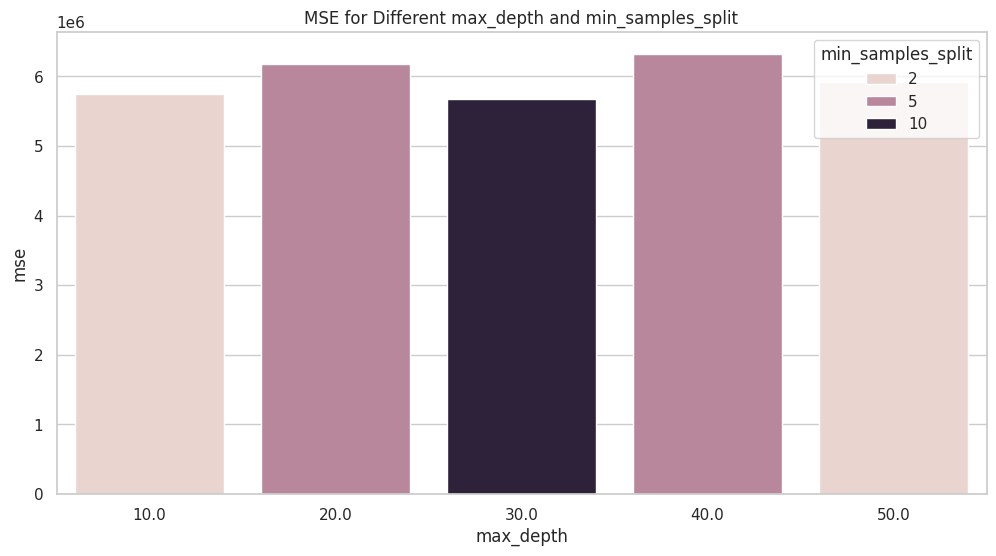

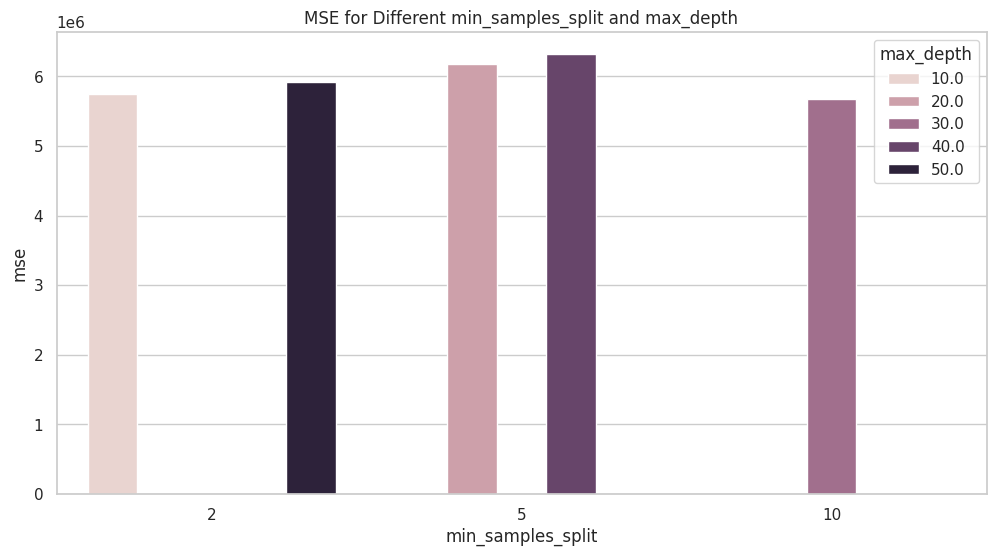

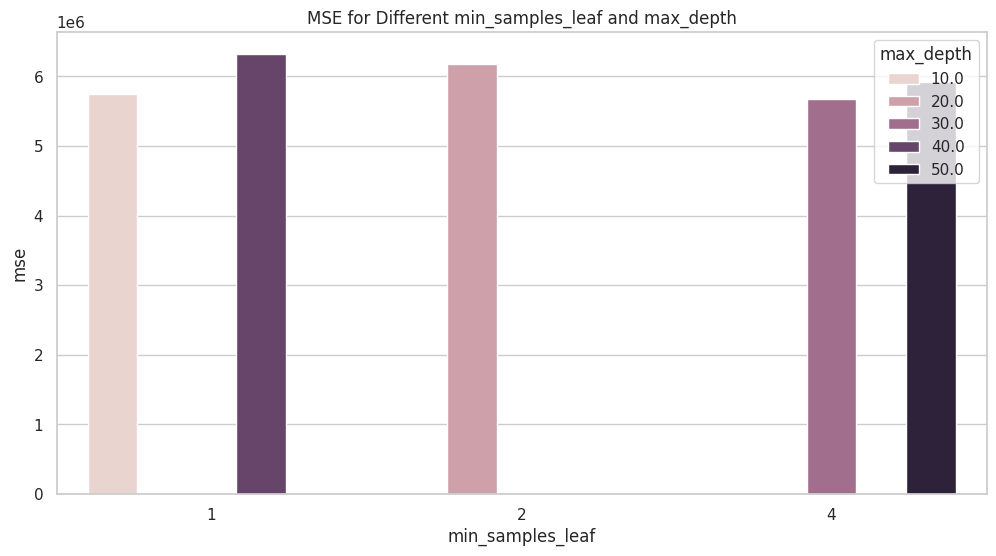

In [ ]:
# Define a list of hyperparameters to test
hyperparameters = [
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4},
    {'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 1},
    {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 4}
]

# Initialize variables to store the best model and lowest MSE
best_mse = float('inf')
best_params = None
best_model = None

# List to store results for visualization
results = []

# Loop over the hyperparameters
for params in hyperparameters:
    # Define the Decision Tree regression model with the current hyperparameters
    tree_model = DecisionTreeRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'])

    # Train the model on the training data
    tree_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tree = tree_model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE)
    mse_tree = mean_squared_error(y_test, y_pred_tree)

    # Append the results to the list
    results.append({'max_depth': params['max_depth'], 'min_samples_split': params['min_samples_split'], 'min_samples_leaf': params['min_samples_leaf'], 'mse': mse_tree})

    # Check if this model has the lowest MSE so far
    if mse_tree < best_mse:
        best_mse = mse_tree
        best_params = params
        best_model = tree_model

# Print the best parameters and MSE
print(f'Best Decision Tree Regression MSE: {best_mse} with parameters: {best_params}')
mse_tree=best_mse
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot MSE values for different max_depth
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='max_depth', y='mse', hue='min_samples_split')
plt.title('MSE for Different max_depth and min_samples_split')
plt.show()

# Plot MSE values for different min_samples_split
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='min_samples_split', y='mse', hue='max_depth')
plt.title('MSE for Different min_samples_split and max_depth')
plt.show()

# Plot MSE values for different min_samples_leaf
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='min_samples_leaf', y='mse', hue='max_depth')
plt.title('MSE for Different min_samples_leaf and max_depth')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)  # Example hyperparameters
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f'Random Forest Regression MSE: {mse_forest}')


Random Forest Regression MSE: 3833573.517527006


IndexError: index 990 is out of bounds for axis 0 with size 29

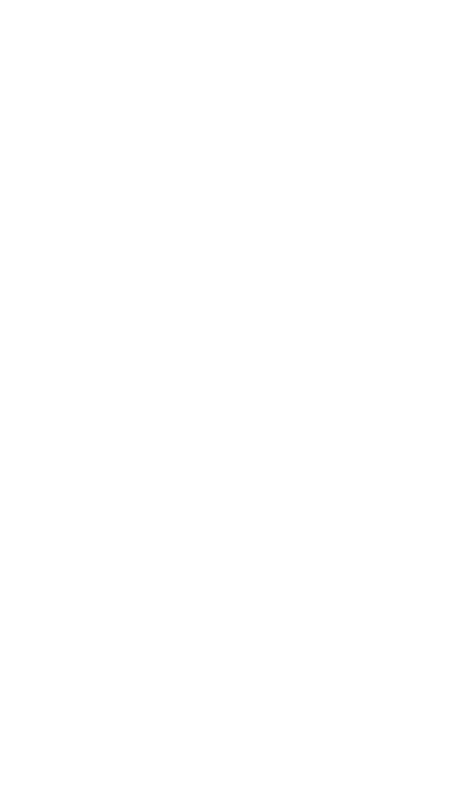

In [ ]:
# Plot a few trees from the random forest
plt.figure(figsize=(20, 10))
num_trees_to_plot = min(3, len(forest_model.estimators_))  # Ensure we don't exceed the number of trees available
for i in range(num_trees_to_plot):  # Plot the first few trees
    plt.subplot(1, num_trees_to_plot, i + 1)
    plot_tree(forest_model.estimators_[i], feature_names=feature_columns, filled=True, max_depth=3)
    plt.title(f'Tree {i + 1}')
plt.show()

In [ ]:
# Compare MSE values
mse_values = {
    'Linear Regression': mse_linear,
    'K-NN Regression': mse_knn,
    'Decision Tree Regression': mse_tree,
    'Random Forest Regression': mse_forest
}


In [ ]:
mse_values

{'Linear Regression': 6897078.43554796,
 'K-NN Regression': 6709090.069476706,
 'Decision Tree Regression': 5665327.508377814,
 'Random Forest Regression': 3833573.517527006}

In [ ]:
# Find the best model based on MSE
best_model_name = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_model_name]
print(f'Best model: {best_model_name} with MSE: {best_mse}')


Best model: Random Forest Regression with MSE: 3833573.517527006


4. Sample a different test set. Rerun the pipeline again with the same parameters you chose above. Print your error. Is it the same? Is it bigger? Smaller? Explain the result by leaving a comment in the notebook.



In [ ]:
# Sample a different test set by changing the random state or test size

# Perform the test-train split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=52)

# Display the shapes of the resulting datasets
(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

((30824, 29), (7707, 29), (30824,), (7707,))

In [ ]:


print(f'Initial Random Forest Regression MSE: {mse_forest}')

forest_model.fit(X_train_new, y_train_new)
y_pred_forest_new = forest_model.predict(X_test_new)
mse_forest_new = mean_squared_error(y_test_new, y_pred_forest_new)
print(f'New Random Forest Regression MSE: {mse_forest_new}')



# Comment on the results
print("Comment on Results:")
if mse_forest_new < mse_forest:
    print("The new MSE is smaller. This could indicate that the new test set features patterns that the model handles better or it is less challenging.")
elif mse_forest_new > mse_forest:
    print("The new MSE is larger. This could be due to the new test set containing more complex or previously unseen patterns, suggesting potential overfitting on the original test set.")
else:
    print("The MSE is the same. This is unlikely in practice and would suggest an extremely stable model across different samples.")


Initial Random Forest Regression MSE: 3833573.517527006


ValueError: could not convert string to float: 'Rover'